# Treball Aprenentatge Automàtic 2--> Classificació d'imatges

In [1]:
# imporem els paquets necessaris:

import numpy as np 
import pandas as pd
import tensorflow as tf
import os
import glob
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from PIL import Image
from tensorflow.keras import layers, models
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
# Assignem on son les carpetes de les imatges train.
imatges="/home/enric/Escritorio/uni portatil/AA2/images_train"
os.chdir(imatges)

In [3]:
# Llistem totes les subcarpetes del nostre directori de treball per agafar els noms.
carpetes=[x[0] for x in os.walk(imatges)]

In [4]:
carpetes

['/home/enric/Escritorio/uni portatil/AA2/images_train',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/airplane',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/harbor',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/freeway',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/forest',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/golfcourse',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/mediumresidential',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/agricultural',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/beach',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/tenniscourt',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/river',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/runway',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/buildings',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/mobilehomepark',
 '/home/enric/Escritorio/uni portatil/AA2/images_train/sparseresidential'

In [5]:
data = []

# ciclo a través de las subcarpetas
for subfolder in carpetes[1:]:
    # ciclo a través de las imágenes de 00.png a 79.png en cada subcarpeta
    for i in range(80):
        image_path = os.path.join(subfolder, f"{i:02d}.png") # formatos los números para que queden con un 0 a la izquierda
        
        # intentar abrir la imagen y manejar excepciones si falla
        try:
            with Image.open(image_path) as img:
                # obtener el nombre de la subcarpeta
                subfolder_name = os.path.basename(subfolder)
                # agregar la imagen y su etiqueta a la lista de datos
                data.append((image_path, subfolder_name))
        except FileNotFoundError:
            print(f"{image_path} no existe.")
        except OSError:
            print(f"No se puede abrir {image_path}.")

# crear un dataframe de pandas desde los datos
df = pd.DataFrame(data, columns=['imagen', 'subcarpeta'])

In [6]:
df.head(10)

,imagen,subcarpeta
0,/home/enric/Escritorio/uni portatil/AA2/images...,airplane
1,/home/enric/Escritorio/uni portatil/AA2/images...,airplane
2,/home/enric/Escritorio/uni portatil/AA2/images...,airplane
3,/home/enric/Escritorio/uni portatil/AA2/images...,airplane
4,/home/enric/Escritorio/uni portatil/AA2/images...,airplane
5,/home/enric/Escritorio/uni portatil/AA2/images...,airplane
6,/home/enric/Escritorio/uni portatil/AA2/images...,airplane
7,/home/enric/Escritorio/uni portatil/AA2/images...,airplane
8,/home/enric/Escritorio/uni portatil/AA2/images...,airplane
9,/home/enric/Escritorio/uni portatil/AA2/images...,airplane


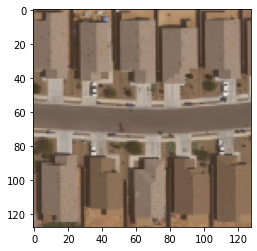

In [7]:
# Comprovem que realment es poden llegir correctament totes les imatges.
sample=random.choice(df.iloc[:,0])
image=load_img(sample)
plt.imshow(image)

In [8]:
df.iloc[78:85]

,imagen,subcarpeta
78,/home/enric/Escritorio/uni portatil/AA2/images...,airplane
79,/home/enric/Escritorio/uni portatil/AA2/images...,airplane
80,/home/enric/Escritorio/uni portatil/AA2/images...,harbor
81,/home/enric/Escritorio/uni portatil/AA2/images...,harbor
82,/home/enric/Escritorio/uni portatil/AA2/images...,harbor
83,/home/enric/Escritorio/uni portatil/AA2/images...,harbor
84,/home/enric/Escritorio/uni portatil/AA2/images...,harbor


#### procedim a fer el model:

In [7]:
# asignem els hiperparametres corresponents a les imatges.
IMAGE_WIDTH=128 # amplada de les fotos
IMAGE_HEIGHT=128 # alçada de les fotos
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT) # definim el tamany total de les imatges. 
IMAGE_CHANNELS=3 # asignem que la imatge te 3 canals ja que és una imatge en color i per tant te una capa RED, una GREEN i una BLUE.





# Definim les mostres train i test
train_df, validate_df = train_test_split(df, test_size=0.2,random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=16

In [8]:
# Per tal de millorar la qualitat de la predicció del nostre model, utilitzarem tècniques de data augmentation.

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    imatges, 
    x_col='imagen',
    y_col='subcarpeta',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

# Ara fem el mateix amb les dades de validació.

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    imatges, 
    x_col='imagen',
    y_col='subcarpeta',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)



Found 1344 validated image filenames belonging to 21 classes.
Found 336 validated image filenames belonging to 21 classes.


In [9]:
# Creem el model amb el que farem les prediccions

from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Flatten
from keras import regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(21, activation='softmax'))
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs=50
history = model.fit_generator(
        train_generator, 
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=total_validate//batch_size,
        steps_per_epoch=total_train//batch_size,
        callbacks=[early_stopping]
    )

#model.summary()

Epoch 1/50


<ipython-input-9-380dc28f7c0a>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


84/84 [==============================] - 10s 113ms/step - loss: 2.9324 - accuracy: 0.0692 - val_loss: 2.8408 - val_accuracy: 0.0893
Epoch 2/50
84/84 [==============================] - 9s 105ms/step - loss: 2.6829 - accuracy: 0.1086 - val_loss: 2.5875 - val_accuracy: 0.1429
Epoch 3/50
84/84 [==============================] - 8s 96ms/step - loss: 2.4827 - accuracy: 0.1592 - val_loss: 2.5627 - val_accuracy: 0.1726
Epoch 4/50
84/84 [==============================] - 8s 97ms/step - loss: 2.4060 - accuracy: 0.1860 - val_loss: 2.2415 - val_accuracy: 0.2351
Epoch 5/50
84/84 [==============================] - 8s 96ms/step - loss: 2.2507 - accuracy: 0.2545 - val_loss: 2.0470 - val_accuracy: 0.3244
Epoch 6/50
84/84 [==============================] - 8s 97ms/step - loss: 1.9960 - accuracy: 0.3162 - val_loss: 2.0761 - val_accuracy: 0.2857
Epoch 7/50
84/84 [==============================] - 8s 96ms/step - loss: 1.9638 - accuracy: 0.3408 - val_loss: 1.7036 - val_accuracy: 0.4048
Epoch 8/50
84/84 [===

In [11]:
# Definim el codi que farem servir per realitzar mostres bootstrap de les dades i poder així entrenar 10 models amb els quals podrem donar una estimació més robusta de l'accuracy de validació del nostre model.
# Definiem el model que hem vist anteriorment
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(21, activation='softmax'))



# Definim l'Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Definim el nombre de mostres  bootstrap
num_bootstrap_samples = 10

# Definim el nombre d'Epochs per cada mostra bootstrap
epochs = 50

# Definim el vector on guardarem l'ultima validation_accuracy de cada mostra booststrap
bootstrap_accuracies = np.zeros(num_bootstrap_samples)

# Realitzem l'entrenament de mostres bootstrap
for i in range(num_bootstrap_samples):
    train_datagen = ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1
    )

    train_generator = train_datagen.flow_from_dataframe(
        train_df, 
        imatges, 
        x_col='imagen',
        y_col='subcarpeta',
        target_size=IMAGE_SIZE,
        class_mode='categorical',
        batch_size=batch_size
    )

# Ara fem el mateix amb les dades de validació.

    validation_datagen = ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow_from_dataframe(
        validate_df, 
        imatges, 
        x_col='imagen',
        y_col='subcarpeta',
        target_size=IMAGE_SIZE,
        class_mode='categorical',
        batch_size=batch_size
    )
    # Creem una mostra bootstrap de les dades d'entrenament
    bootstrap_train_data = []
    bootstrap_train_labels = []
    for j in range(len(train_generator)):
        batch_data, batch_labels = next(train_generator)
        bootstrap_train_data.append(batch_data)
        bootstrap_train_labels.append(batch_labels)
    bootstrap_train_data = np.concatenate(bootstrap_train_data, axis=0)
    bootstrap_train_labels = np.concatenate(bootstrap_train_labels, axis=0)

    # Entrenem el model amb la mostra d'entrenament
    model.fit(bootstrap_train_data, bootstrap_train_labels, epochs=epochs, verbose=0, validation_data=validation_generator,callbacks=[early_stopping])

    # Evaluem el model amb la mostra de validació i guardem l'últim accuracy
    bootstrap_accuracy = model.evaluate(validation_generator, verbose=0)
    bootstrap_accuracies[i] = bootstrap_accuracy[1]

# Caluclem la mitjana de l'última validation_accuracy de cada mostra 
average_accuracy = np.mean(bootstrap_accuracies)

print("Estimated accuracy using bootstrap validation:", average_accuracy)


Found 1344 validated image filenames belonging to 21 classes.
Found 336 validated image filenames belonging to 21 classes.
Found 1344 validated image filenames belonging to 21 classes.
Found 336 validated image filenames belonging to 21 classes.
Found 1344 validated image filenames belonging to 21 classes.
Found 336 validated image filenames belonging to 21 classes.
Found 1344 validated image filenames belonging to 21 classes.
Found 336 validated image filenames belonging to 21 classes.
Found 1344 validated image filenames belonging to 21 classes.
Found 336 validated image filenames belonging to 21 classes.
Found 1344 validated image filenames belonging to 21 classes.
Found 336 validated image filenames belonging to 21 classes.
Found 1344 validated image filenames belonging to 21 classes.
Found 336 validated image filenames belonging to 21 classes.
Found 1344 validated image filenames belonging to 21 classes.
Found 336 validated image filenames belonging to 21 classes.
Found 1344 valid

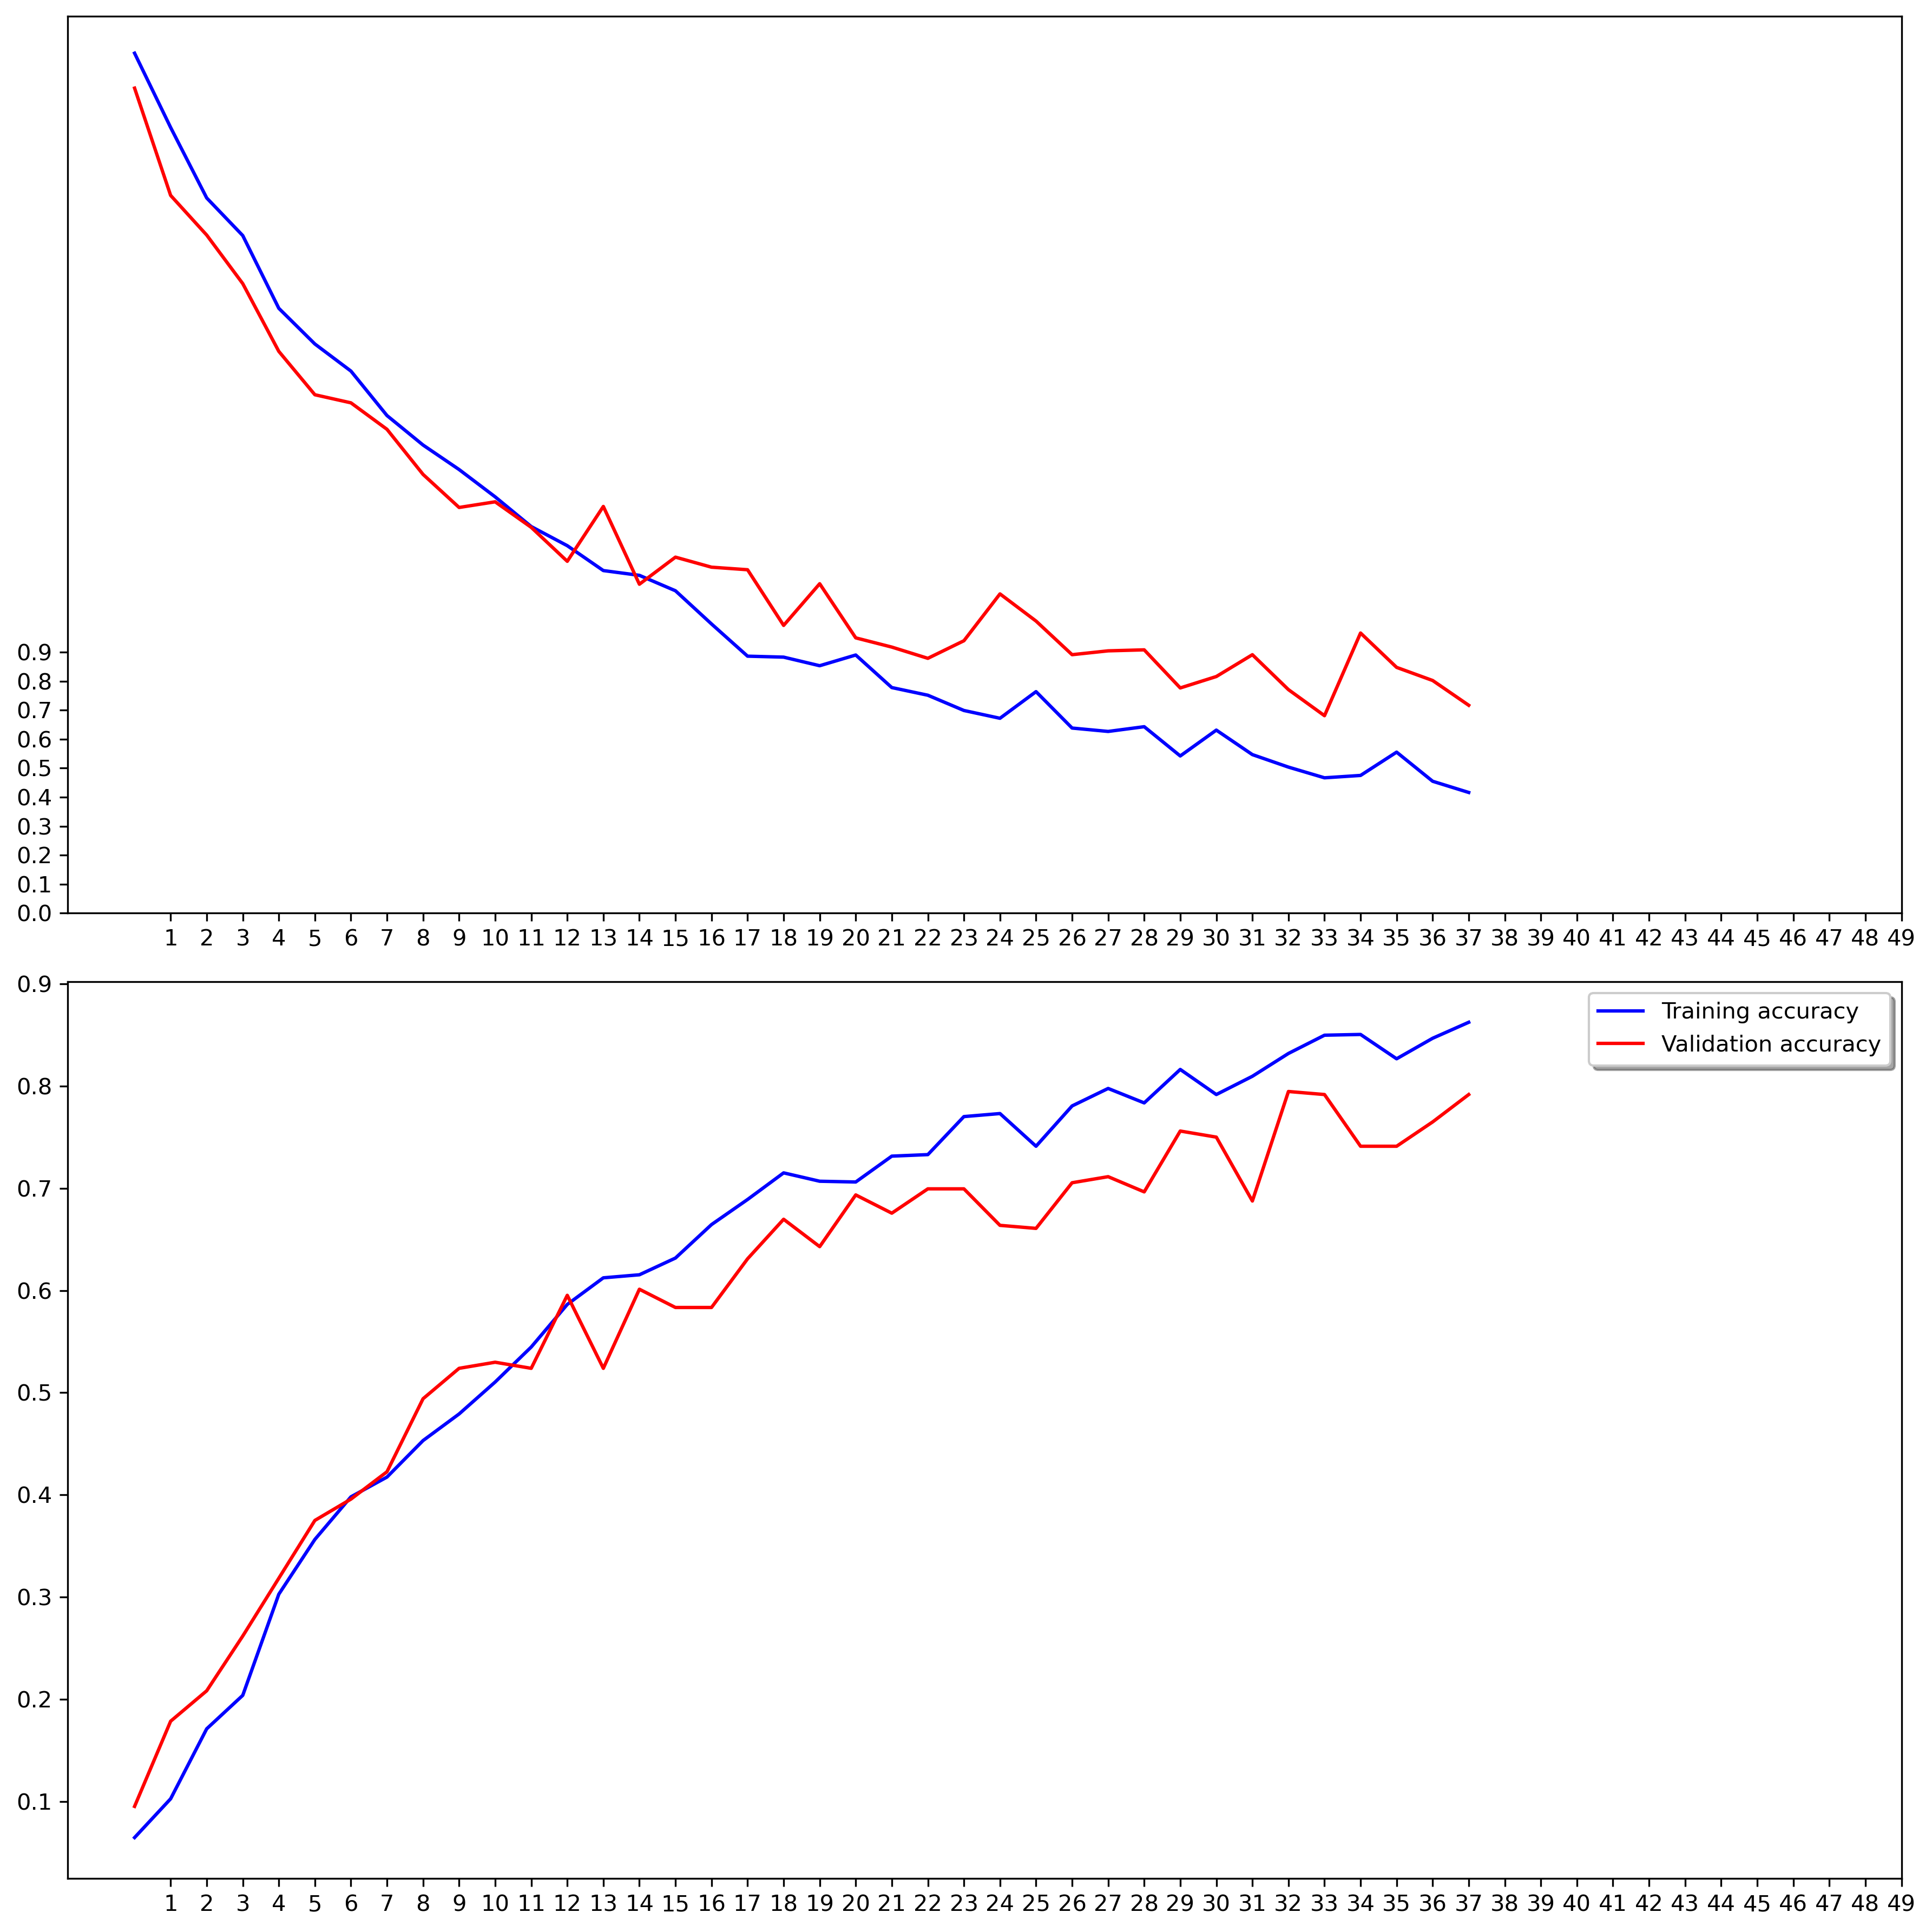

In [14]:
# Mirem les mètriques de comportament:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), dpi=300)
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [15]:
# Un altre tipus de gràfic per visualitzar les mètriques de comportament.

def accuracy_plot(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Model accuracy")
    plt.ylabel("Accuracy")
    plt.legend(["Train_val", "Test_val"], loc="upper left")
    plt.show()
    
def loss_plot(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train_loss", "Test_loss"], loc="upper left")
    plt.show()

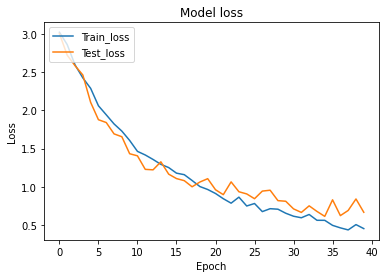

In [26]:
loss_plot(history)


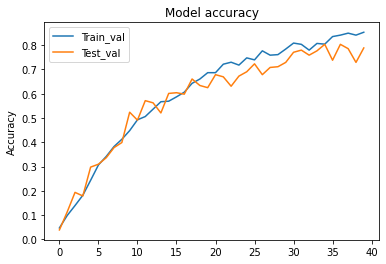

In [27]:
accuracy_plot(history)

Test loss: 0.7233748435974121
Test accuracy: 0.7559523582458496
21/21 [==============================] - 0s 17ms/step


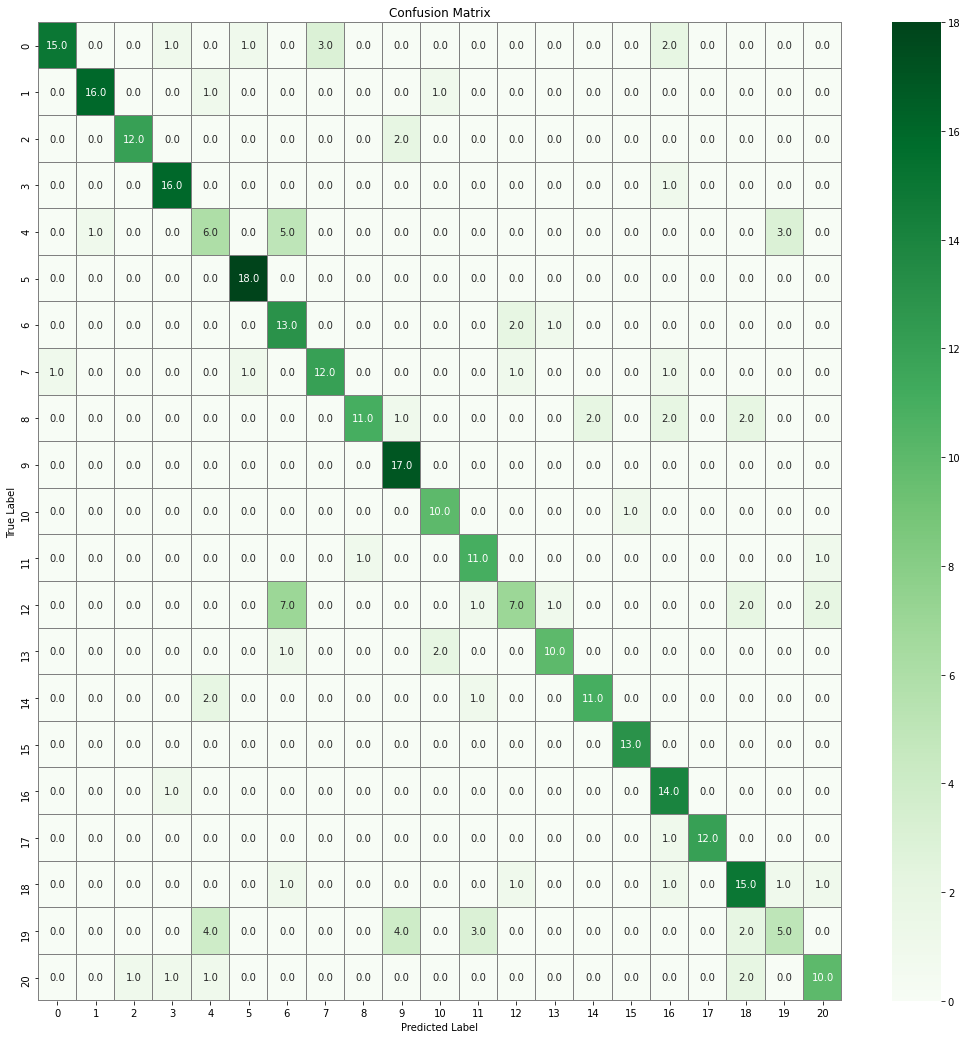

In [10]:
# Realitzem una confusion matrix per asegurar que prediu bé les categories.
score = model.evaluate(validation_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import seaborn as sns
from sklearn.metrics import confusion_matrix

pred = model.predict(validation_generator)
pred_classes = np.argmax(pred, axis=1)
Y_true = validation_generator.classes

# Calculem la confusion matrix
confusion_mtx = confusion_matrix(Y_true, pred_classes)

# Visualitzem la confusion matrix
plt.figure(figsize=(18, 18))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:

##### Estructura per predir les imatges test

test_imatges="/home/enric/Escritorio/uni portatil/AA2/images_test"

In [ ]:
import numpy as np
from PIL import Image
import os

folder_path = "/home/enric/Escritorio/uni portatil/AA2/images_test"  # Ruta de la carpeta que conté les imatges test
image_list = []  # Llista per emmagatzemar les rutes de les imatges

file_list = os.listdir(folder_path)

# Recorrem la llista d'arxius de la carpeta
for file_name in file_list:
    if file_name.endswith(".jpg") or file_name.endswith(".png"):
        
        image_path = os.path.join(folder_path, file_name)

        image = Image.open(image_path)

        image_array = np.array(image)

        image_list.append(image_array)

# Apliquem el mateix preprocess a les imatges test
validation_set = np.array(image_list)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_set_preprocess = validation_datagen.flow(
    validation_set,
    batch_size=batch_size,
    shuffle=False
)

# Obtenim les prediccions del nostre model.
predictions = model.predict(validation_set_preprocess)



# Verificar las dimensiones del conjunto de validación
print("Dimensions del conjunt de validació:", validation_set.shape)


In [ ]:
prediccions=model.predict(validation_set)

In [ ]:
predicted_classes = np.argmax(prediccions, axis=1)

print("Clases predichas:", predicted_classes)

In [ ]:
len(predicted_classes)